### The purpose of the case study is to classify a given silhouette as one of four different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

### Four &quot;Corgie&quot; model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

### The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

<h3> ATTRIBUTES 

1. COMPACTNESS	(average perim)**2/area 
2. CIRCULARITY	(average radius)**2/area 
3. DISTANCE CIRCULARITY	area/(av.distance from border)**2 
4. RADIUS RATIO	(max.rad-min.rad)/av.radius 
5. PR.AXIS ASPECT RATIO	(minor axis)/(major axis) 
6. MAX.LENGTH ASPECT RATIO	(length perp. max length)/(max length) 
7. SCATTER RATIO	(inertia about minor axis)/(inertia about major axis) 
8. ELONGATEDNESS	area/(shrink width)**2 
9. PR.AXIS RECTANGULARITY	area/(pr.axis length*pr.axis width) 
10. MAX.LENGTH RECTANGULARITY area/(max.length*length perp. to this) 
11. SCALED VARIANCE (2nd order moment about minor axis)/area 
12. SCALED VARIANCE (2nd order moment about major axis)/area 
13. ALONG MINOR AXIS 
13. SCALED RADIUS OF GYRATION	(mavar+mivar)/area 
14. SKEWNESS ABOUT (3rd order moment about major axis)/sigma_min**3 
15. SKEWNESS ABOUT (3rd order moment about minor axis)/sigma_maj**3 
16. MINOR AXIS 
17. KURTOSIS ABOUT (4th order moment about major axis)/sigma_min**4 
18. KURTOSIS ABOUT (4th order moment about minor axis)/sigma_maj**4 
19. HOLLOWS RATIO	(area of hollows)/(area of bounding polygon) 

Where sigma_maj**2 is the variance along the major axis and sigma_min**2 is the variance along the minor axis, and 
area of hollows= area of bounding poly-area of object.

The area of the bounding polygon is found as a side result of the computation to find the maximum length. Each individual length computation yields a pair of calipers to the object orientated at every 5 degrees. The object is propagated into an image containing the union of these calipers to obtain an image of the bounding polygon. 

NUMBER OF CLASSES 
4	OPEL, SAAB, BUS, VAN 

<h1> 1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)

In [371]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn import model_selection
from scipy.stats import zscore


In [372]:
vehi = pd.read_csv("vehicle.csv", delim_whitespace = '')
vehi.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [373]:
vehi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

### This dataset has 19 attributes and 845 columns. 

In [374]:
vehi.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [375]:
missing_values=vehi.columns[vehi.isnull().any()]
vehi[missing_values].isnull().sum()

circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
dtype: int64

### There seems to be 14 attributes with missing values. We will treat the missing attributes of Circularity, distance_circularity , radius_ratio, pr.axis_aspect_ratio, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration,scaled_radius_of_gyration.1, skewness_about. and drop the rows of the 4 attribute with just one missing values.


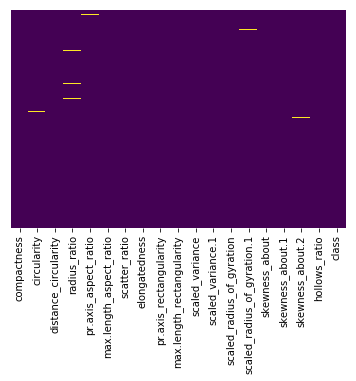

In [376]:
sns.heatmap(vehi.isnull(),yticklabels=False,cbar=False,cmap='viridis')

TypeError: cannot perform reduce with flexible type

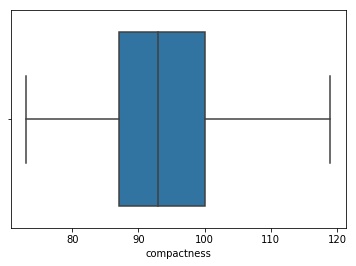

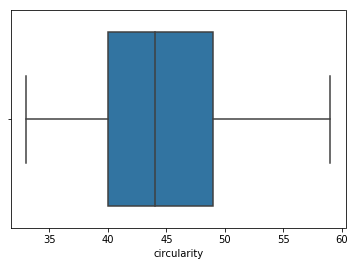

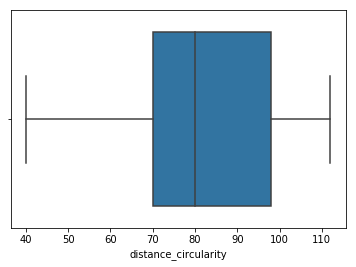

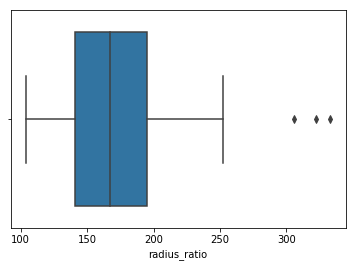

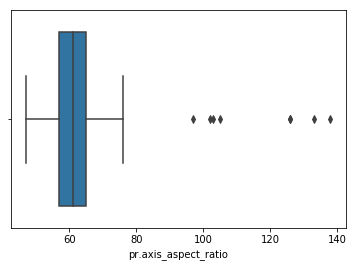

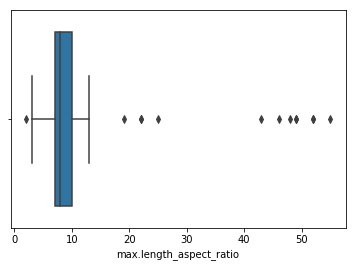

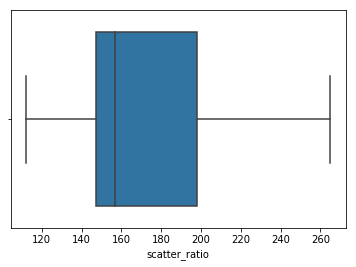

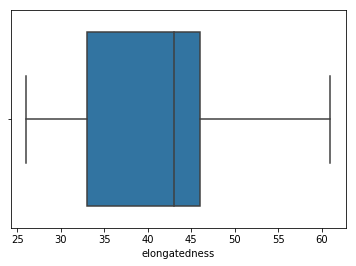

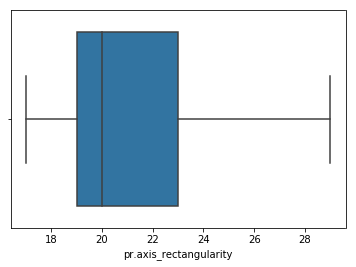

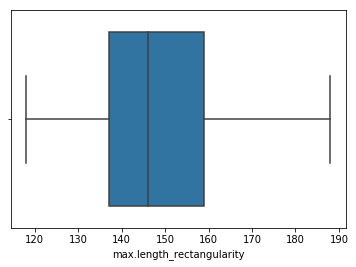

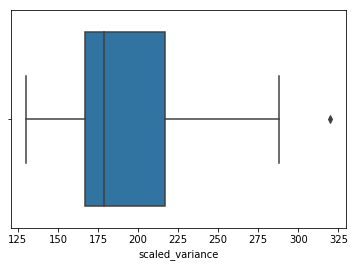

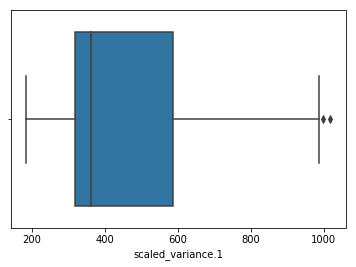

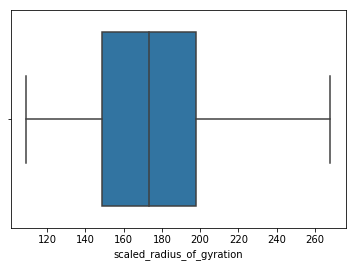

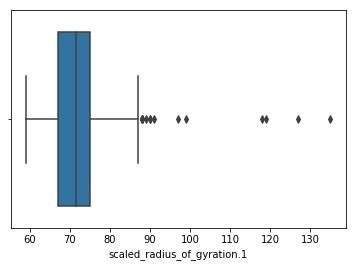

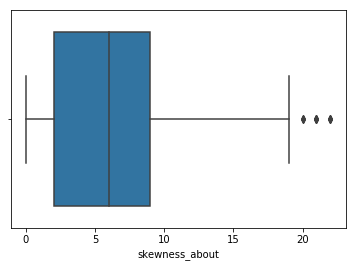

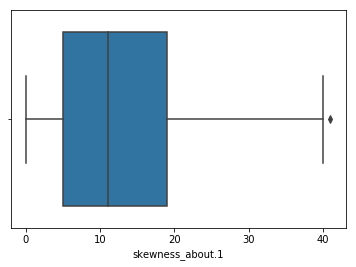

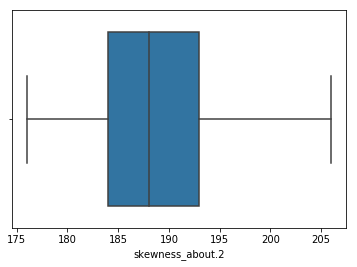

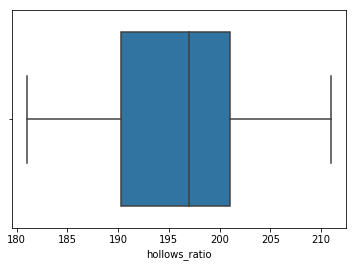

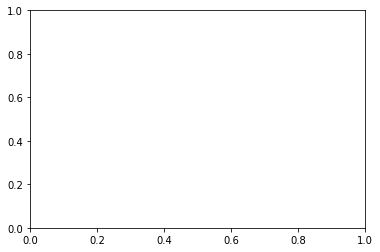

In [377]:
for i, col in enumerate(vehi):
    plt.figure(i)
    sns.boxplot(vehi[col])

<h3>
1. Based on the above analysis, we can conclude that we have missing values and outliers in the dataset. 
2. The dataset needs to be treated for missing values and outliers, by replacing the nan values with median values.
3. Since we are replacing the missing values by median it makes more sense to replace it with the median of the grouped class.

In [378]:
vehi.groupby('class').median()

compactness  circularity  distance_circularity  radius_ratio  \
class                                                                 
bus             89         44.0                  72.0         167.5   
car             97         46.0                  94.0         186.0   
van             90         42.0                  75.0         144.0   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
class                                                                 
bus                    64.0                        6          152.0   
car                    61.0                        9          185.0   
van                    59.0                        9          142.0   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
class                                                                     
bus             44.0                    19.0                        145   
car             36.0                    22.0                        150   
van             47.0                    18.0                        145   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
class                                                                  
bus              177.0              344.0                      176.0   
car              206.0              512.0                      182.0   
van              164.0              300.0                      159.0   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
class                                                                  
bus                           76.0             5.0              10.0   
car                           70.0             6.0              14.0   
van                           72.0             6.0               9.0   

       skewness_about.2  hollows_ratio  
class                                   
bus               186.0            189  
car               189.0            198  
van               188.0            196

In [379]:
for col in vehi.columns[:-1]:

    vehi[col] = vehi.groupby('class')[col].apply(lambda x: x.fillna(x.median()))
    vehi[col] = vehi[col].fillna(vehi[col].median())

In [380]:
missing_values=vehi.columns[vehi.isnull().any()]
vehi[missing_values].isnull().sum()

Series([], dtype: float64)

### Observation : All the missing values are removed from the dataset 

<h3> 
1. The outliers can be treated after splitting of the dataset into test and training data.
2. Class will be dependant variable since this problem statement is to determine the class type of any given test dataset.
3. Class will be label encoded

In [381]:
# class is label encoded
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
vehi['class'] = labelencoder.fit_transform(vehi['class'])
vehi.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  class  
0             187.0            197      2  
1             189.0            199      2  
2             188.0            196      1  
3             199.0            207      2  
4             180.0            183      0

In [382]:
# train and test data is split as 70:30
X = vehi.iloc[:,:-1]
y = vehi['class']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=1)

In [383]:
# Standardizing and Imputing outliers with Median.
from scipy.stats import zscore

# Standardizing with zscore
X_train = X_train.apply(zscore)
X_test = X_test.apply(zscore)

X_train.head()

compactness  circularity  distance_circularity  radius_ratio  \
350     0.393839     0.189001              1.184028      1.247934   
40      0.148415     0.513316              1.372488      1.369464   
89     -1.692265    -1.270415             -1.580048     -1.608006   
427    -0.955993    -1.108258              0.430189      0.214935   
353    -1.569553     0.351158             -0.826209     -0.696536   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
350              0.637183                -0.097445       0.676101   
40               0.780610                 0.163584       1.063393   
89              -0.940511                -0.619503      -1.319944   
427             -0.366804                 0.163584      -0.009109   
353              0.350330                -0.619503      -0.545359   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
350      -0.745390                0.535671                   0.206748   
40       -1.126233                0.918663                   0.206748   
89        1.666619               -0.996297                  -1.591143   
427      -0.237598               -0.230313                  -1.107096   
353       0.397141               -0.613305                  -0.069851   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
350         0.610876           0.581796                  -0.185270   
40          1.211185           1.039776                   0.805814   
89         -1.474407          -1.188687                  -1.296486   
427         0.042163          -0.077248                  -0.815960   
353        -0.558146          -0.568739                   0.595584   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
350                    -0.855194       -1.078247          2.124763   
40                      0.231233       -0.229414         -0.392927   
89                      1.181856        0.407210         -0.830786   
427                    -0.719391        0.195002          2.234227   
353                     0.367036       -0.229414         -1.378109   

     skewness_about.2  hollows_ratio  
350          0.323158       0.560828  
40          -0.488853      -0.360326  
89          -1.788070      -1.544666  
427          0.647963       0.824015  
353         -0.976059      -1.018293

In [384]:
# outliers are removed by grouping then as class
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

train_set= pd.concat([X_train, y_train], axis=1)
test_set= pd.concat([X_test, y_test], axis=1)

X_train = (train_set.groupby('class').transform(replace)) 
X_test = (test_set.groupby('class').transform(replace)) 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000050ABDF9F98>,
      dtype=object)

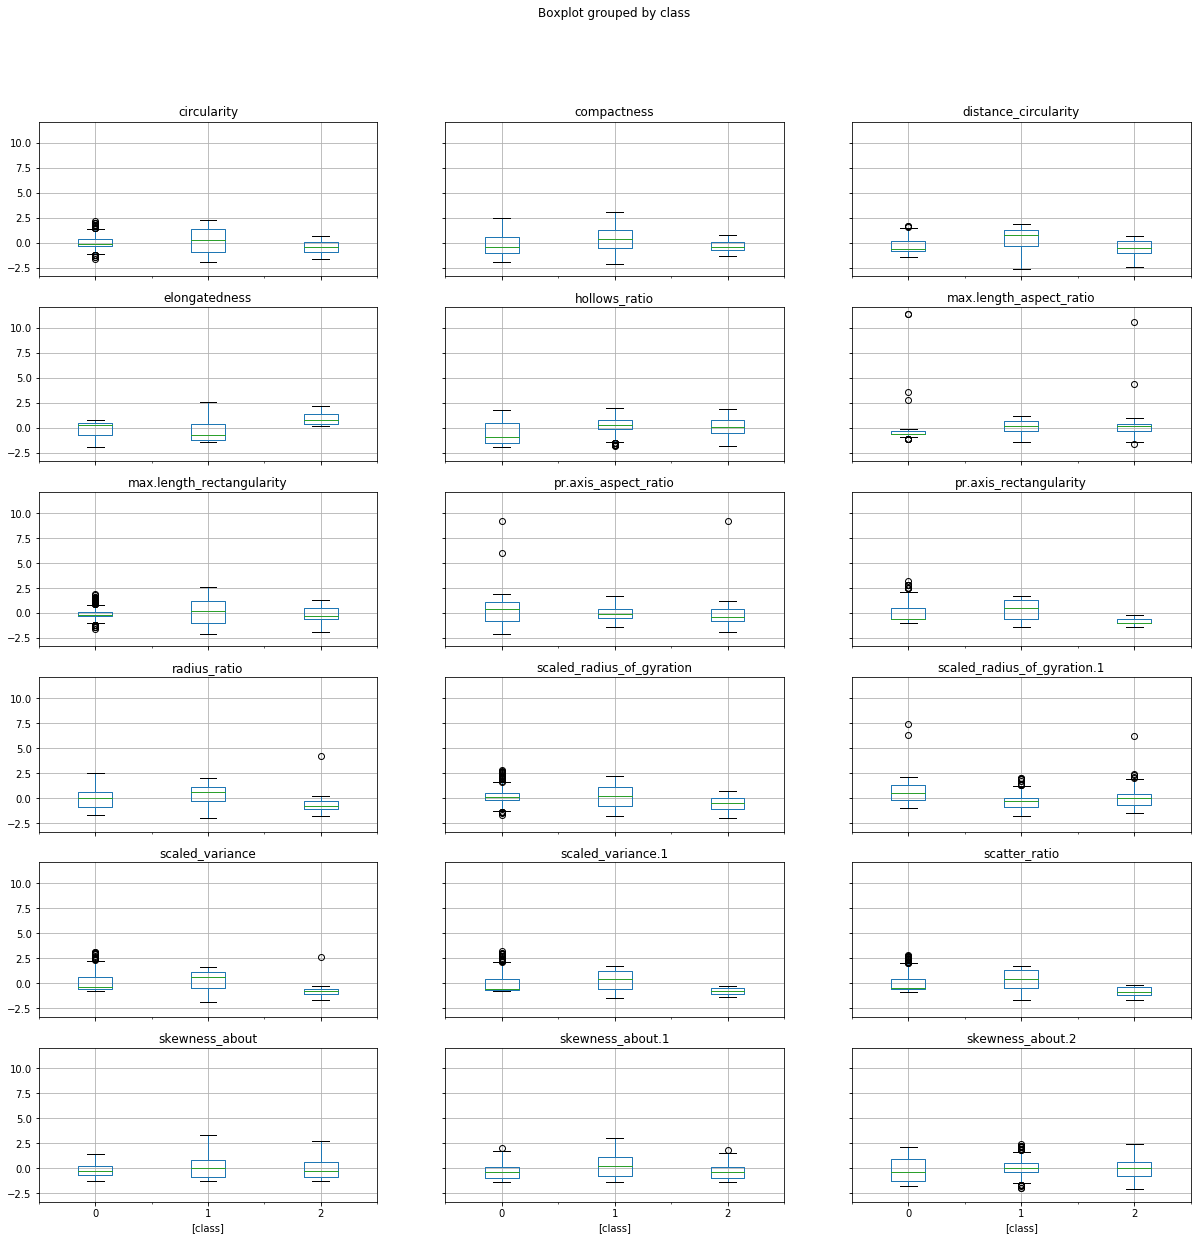

In [385]:
train_set.boxplot(by = 'class',  layout=(6,3), figsize=(20, 20))

<h3> Observations:  Outliers are treated by grouping them by class. Even after treating the trainset for outliers there are some outliers formed because of the new median value.

<h1> 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


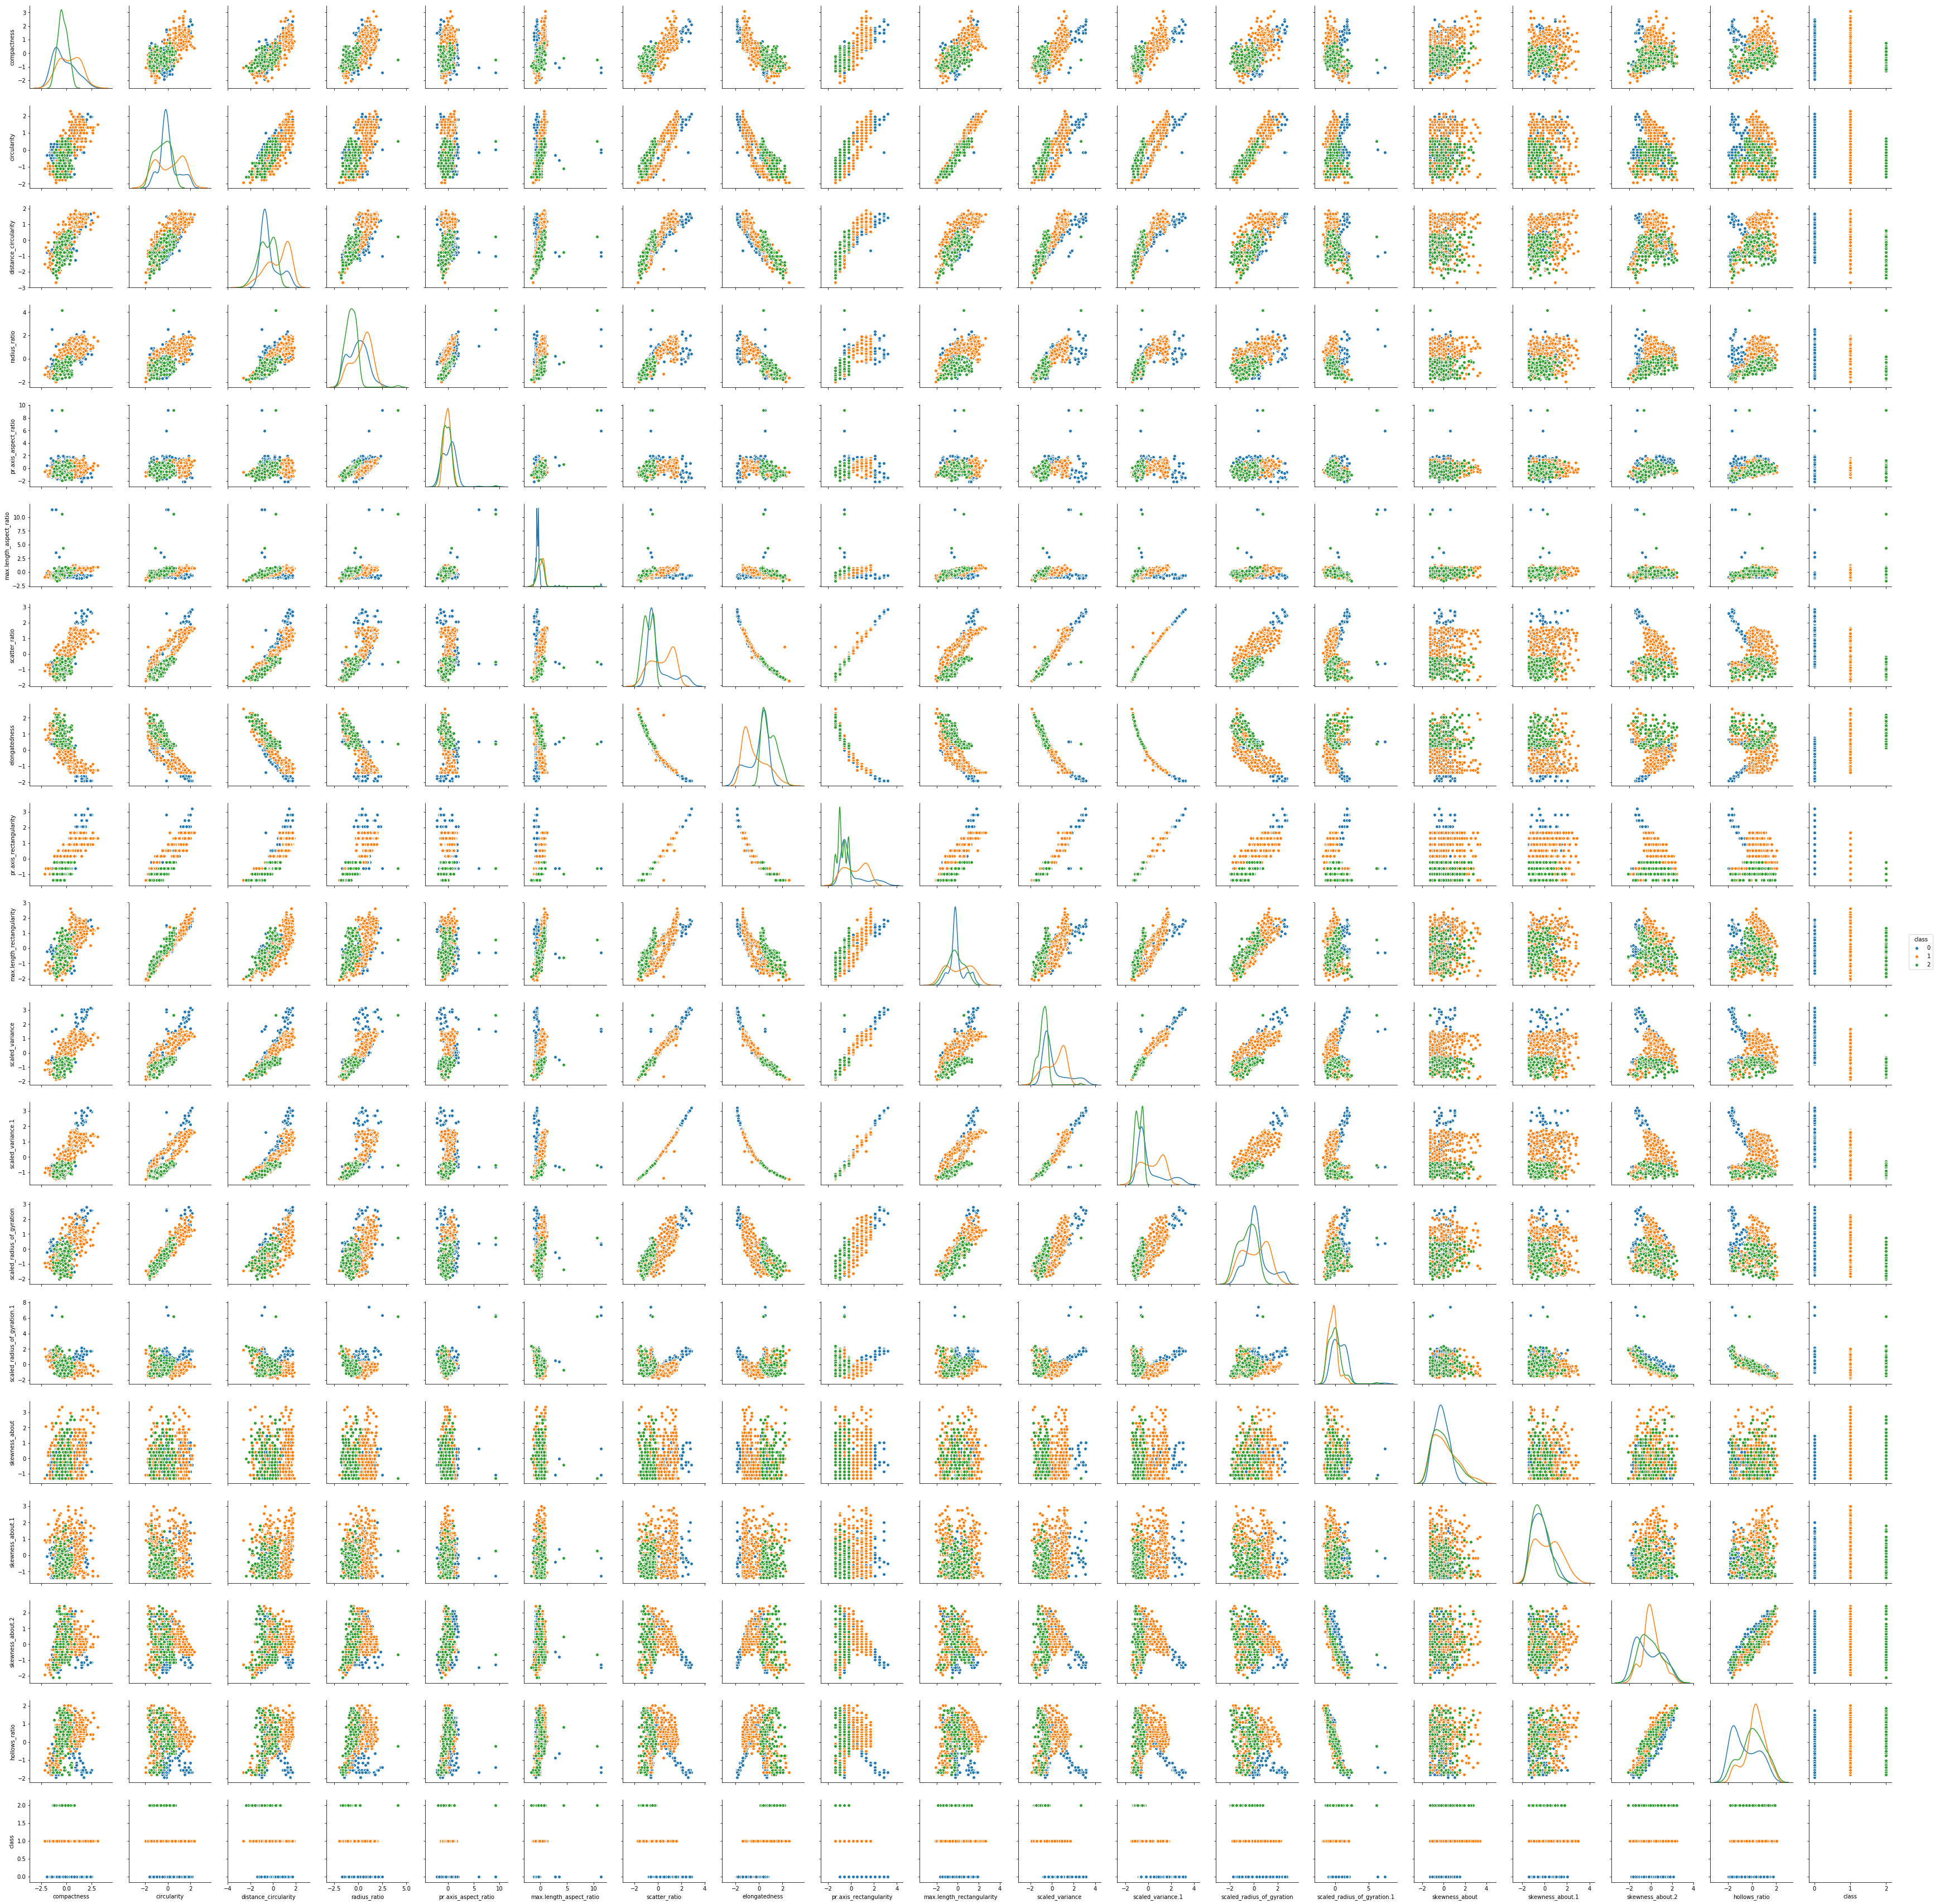

In [386]:
sns.pairplot(train_set,diag_kind='kde',hue='class')

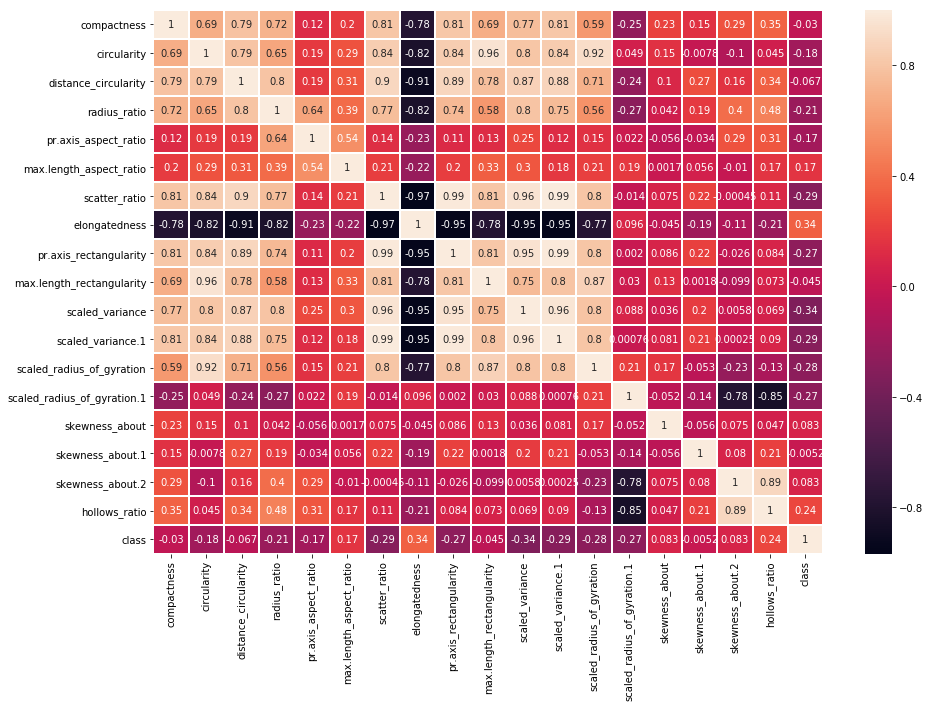

In [387]:
plt.subplots(figsize=(15,10))
sns.heatmap(train_set.corr(), annot=True, linewidths=1)

<h3> observations: From the above analysis we can conclude that the pairplot shows a lot of correlation between variables and it creates overlapping data  
    
    1. There is a strong positive correlation between Circularity and distance_circularity, scatter_ratio,pr.axis_rectangularity, max.length_rectangularity, scaled_variance ,scaled_variance.1, scaled_radius_of_gyration.
    2. There is correlation between distance_circularity and scatter_ratio, scaled_variance, scaled_variance.1.
    3. Circularity attribute has high colineraity with scaled_radius_of_gyration , max_length_rectangu;arity.
    4. There are so much high correlation between attributes, which are retained so that PCA might work on all this,
    5. The variables whihc has the least correlation with Class target variable is removed. the variables with least correlation is Compactness,distance_circularity,Pr.axis_aspect_ratio,max.length_rectangularity,skewdness_about.1, skewdness_about.2
    6. the above 6 attributes are hence removed from the dtatset.
    

In [388]:
# remove the 6 attributes from the dataset
columns = ['compactness','distance_circularity','pr.axis_aspect_ratio','max.length_rectangularity','skewness_about.1','skewness_about.2']
X_train.drop(columns, axis=1, inplace=True)
X_test.drop(columns, axis=1, inplace=True)

In [389]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 350 to 37
Data columns (total 12 columns):
circularity                    592 non-null float64
radius_ratio                   592 non-null float64
max.length_aspect_ratio        592 non-null float64
scatter_ratio                  592 non-null float64
elongatedness                  592 non-null float64
pr.axis_rectangularity         592 non-null float64
scaled_variance                592 non-null float64
scaled_variance.1              592 non-null float64
scaled_radius_of_gyration      592 non-null float64
scaled_radius_of_gyration.1    592 non-null float64
skewness_about                 592 non-null float64
hollows_ratio                  592 non-null float64
dtypes: float64(12)
memory usage: 80.1 KB


In [390]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 693 to 830
Data columns (total 12 columns):
circularity                    254 non-null float64
radius_ratio                   254 non-null float64
max.length_aspect_ratio        254 non-null float64
scatter_ratio                  254 non-null float64
elongatedness                  254 non-null float64
pr.axis_rectangularity         254 non-null float64
scaled_variance                254 non-null float64
scaled_variance.1              254 non-null float64
scaled_radius_of_gyration      254 non-null float64
scaled_radius_of_gyration.1    254 non-null float64
skewness_about                 254 non-null float64
hollows_ratio                  254 non-null float64
dtypes: float64(12)
memory usage: 25.8 KB


### These are 12 attibutes over which PCA is done.

<h1> 3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 10 points

In [391]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

pca = PCA(n_components=.98)
data_reduced = pca.fit_transform(X_train)
data_reduced.transpose()

array([[ 1.73417083,  2.85287153, -1.39502102, ...,  0.29297428,
        -0.63463323, -0.77411471],
       [-1.05399   ,  0.63025525, -1.09548545, ..., -1.28616256,
         1.02095625,  0.61244305],
       [-1.11270719, -0.50839928,  0.15017263, ..., -0.76403282,
        -0.62984488, -0.65008388],
       ...,
       [-0.02732435, -0.15717463,  0.42174914, ..., -0.07389062,
        -0.20631907,  0.23942373],
       [-0.17177596,  0.0980626 ,  1.0140152 , ..., -0.06220023,
         0.28264448,  0.1735343 ],
       [-0.31182864, -0.07816706,  0.46498601, ..., -0.0797893 ,
         0.12169599, -0.05937357]])

In [392]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [393]:
# Training data
print(X_train.shape)
print(X_train_pca.shape)

(592, 12)
(592, 8)


In [394]:
# Testing data
print(X_test.shape)
print(X_test_pca.shape)

(254, 12)
(254, 8)


### This PCA has reduced the dimensionality from 12 to 8

In [395]:
#step -1 covariance matrix
cov_matrix = np.cov(X_train.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 0.91457675  0.51879331  0.29925415  0.68583542 -0.56595944  0.65985938
   0.55048942  0.69291321  0.79806997  0.04725356  0.10457798  0.06973613]
 [ 0.51879331  0.88453612  0.2131007   0.6423168  -0.62802382  0.61675964
   0.60199934  0.62615295  0.4391906  -0.2741269   0.02670323  0.4081426 ]
 [ 0.29925415  0.2131007   0.28503209  0.29168442 -0.2324523   0.29632866
   0.22410796  0.2809219   0.21283163 -0.13105459  0.02509627  0.20275309]
 [ 0.68583542  0.6423168   0.29168442  0.79287611 -0.69412426  0.76442573
   0.66590177  0.75852511  0.57968761 -0.08707947  0.0603343   0.21411844]
 [-0.56595944 -0.62802382 -0.2324523  -0.69412426  0.7365425  -0.68378397
  -0.66490944 -0.66322905 -0.48024574  0.11057823 -0.04347123 -0.2148761 ]
 [ 0.65985938  0.61675964  0.29632866  0.76442573 -0.68378397  0.77225277
   0.66157779  0.73220872  0.55285951 -0.0967948   0.06633947  0.21844971]
 [ 0.55048942  0.60199934  0.22410796  0.66590177 -0.66490944  0.66157779
   0.69397

In [396]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.35318639 -0.22246628  0.12271227  0.51226779 -0.0542654   0.05296996
  -0.16404203 -0.428459   -0.56459733  0.10076801 -0.05537161 -0.00798355]
 [-0.3353696   0.20404871 -0.0873933  -0.2307552  -0.73393085 -0.02913658
  -0.04052097  0.00973586 -0.02875375  0.07041247  0.07886627  0.48141567]
 [-0.14574416  0.07541709  0.04906484  0.25257707  0.43335531 -0.01506622
   0.15279601  0.13139681  0.04243583 -0.03510774  0.58355341  0.57850227]
 [-0.37187531 -0.02787597 -0.05888226 -0.10367642  0.21425449  0.80212362
  -0.03056277  0.12923569  0.14837388  0.09622258 -0.31113871  0.10812785]
 [ 0.34018299 -0.01714332  0.11190721  0.32303721 -0.09053424  0.04921348
  -0.0562245  -0.49359366  0.56156719  0.15512745 -0.23525779  0.33900236]
 [-0.36337171 -0.01626734 -0.05013309 -0.12652456  0.29372248 -0.4351639
  -0.68834774  0.05888227  0.22577378  0.08376724 -0.17978289  0.07701747]
 [-0.3283094  -0.01906413 -0.11586849 -0.31520398  0.0550078   0.05924628
   0.10185691 -

In [397]:
#Step -3 
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 60.77373303  79.02144329  86.83220199  91.89613022  94.96319225
  96.3746994   97.527491    98.42408595  99.06409913  99.54358266
  99.86145127 100.        ]


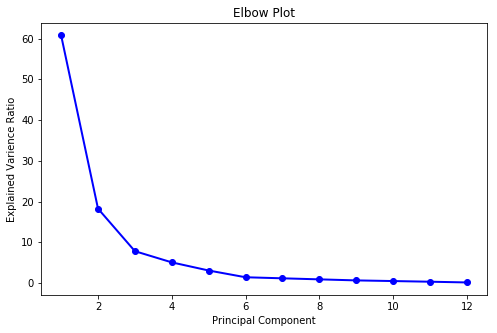

In [398]:
fig = plt.figure(figsize=(8,5))
plt.plot(range(1, eig_vals.size + 1), var_exp, 'bo-', linewidth=2)
plt.title('Elbow Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Varience Ratio')
plt.show()

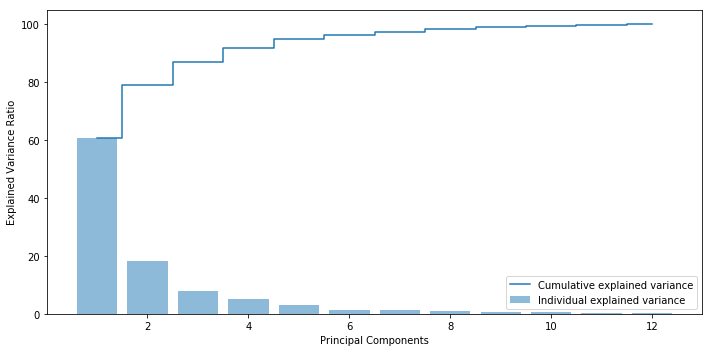

In [399]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

### Observation :  From the above diagrams we can conclude that the variance after 8 is not significant and we can assume that it can have a varinace of .98 at around 8

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


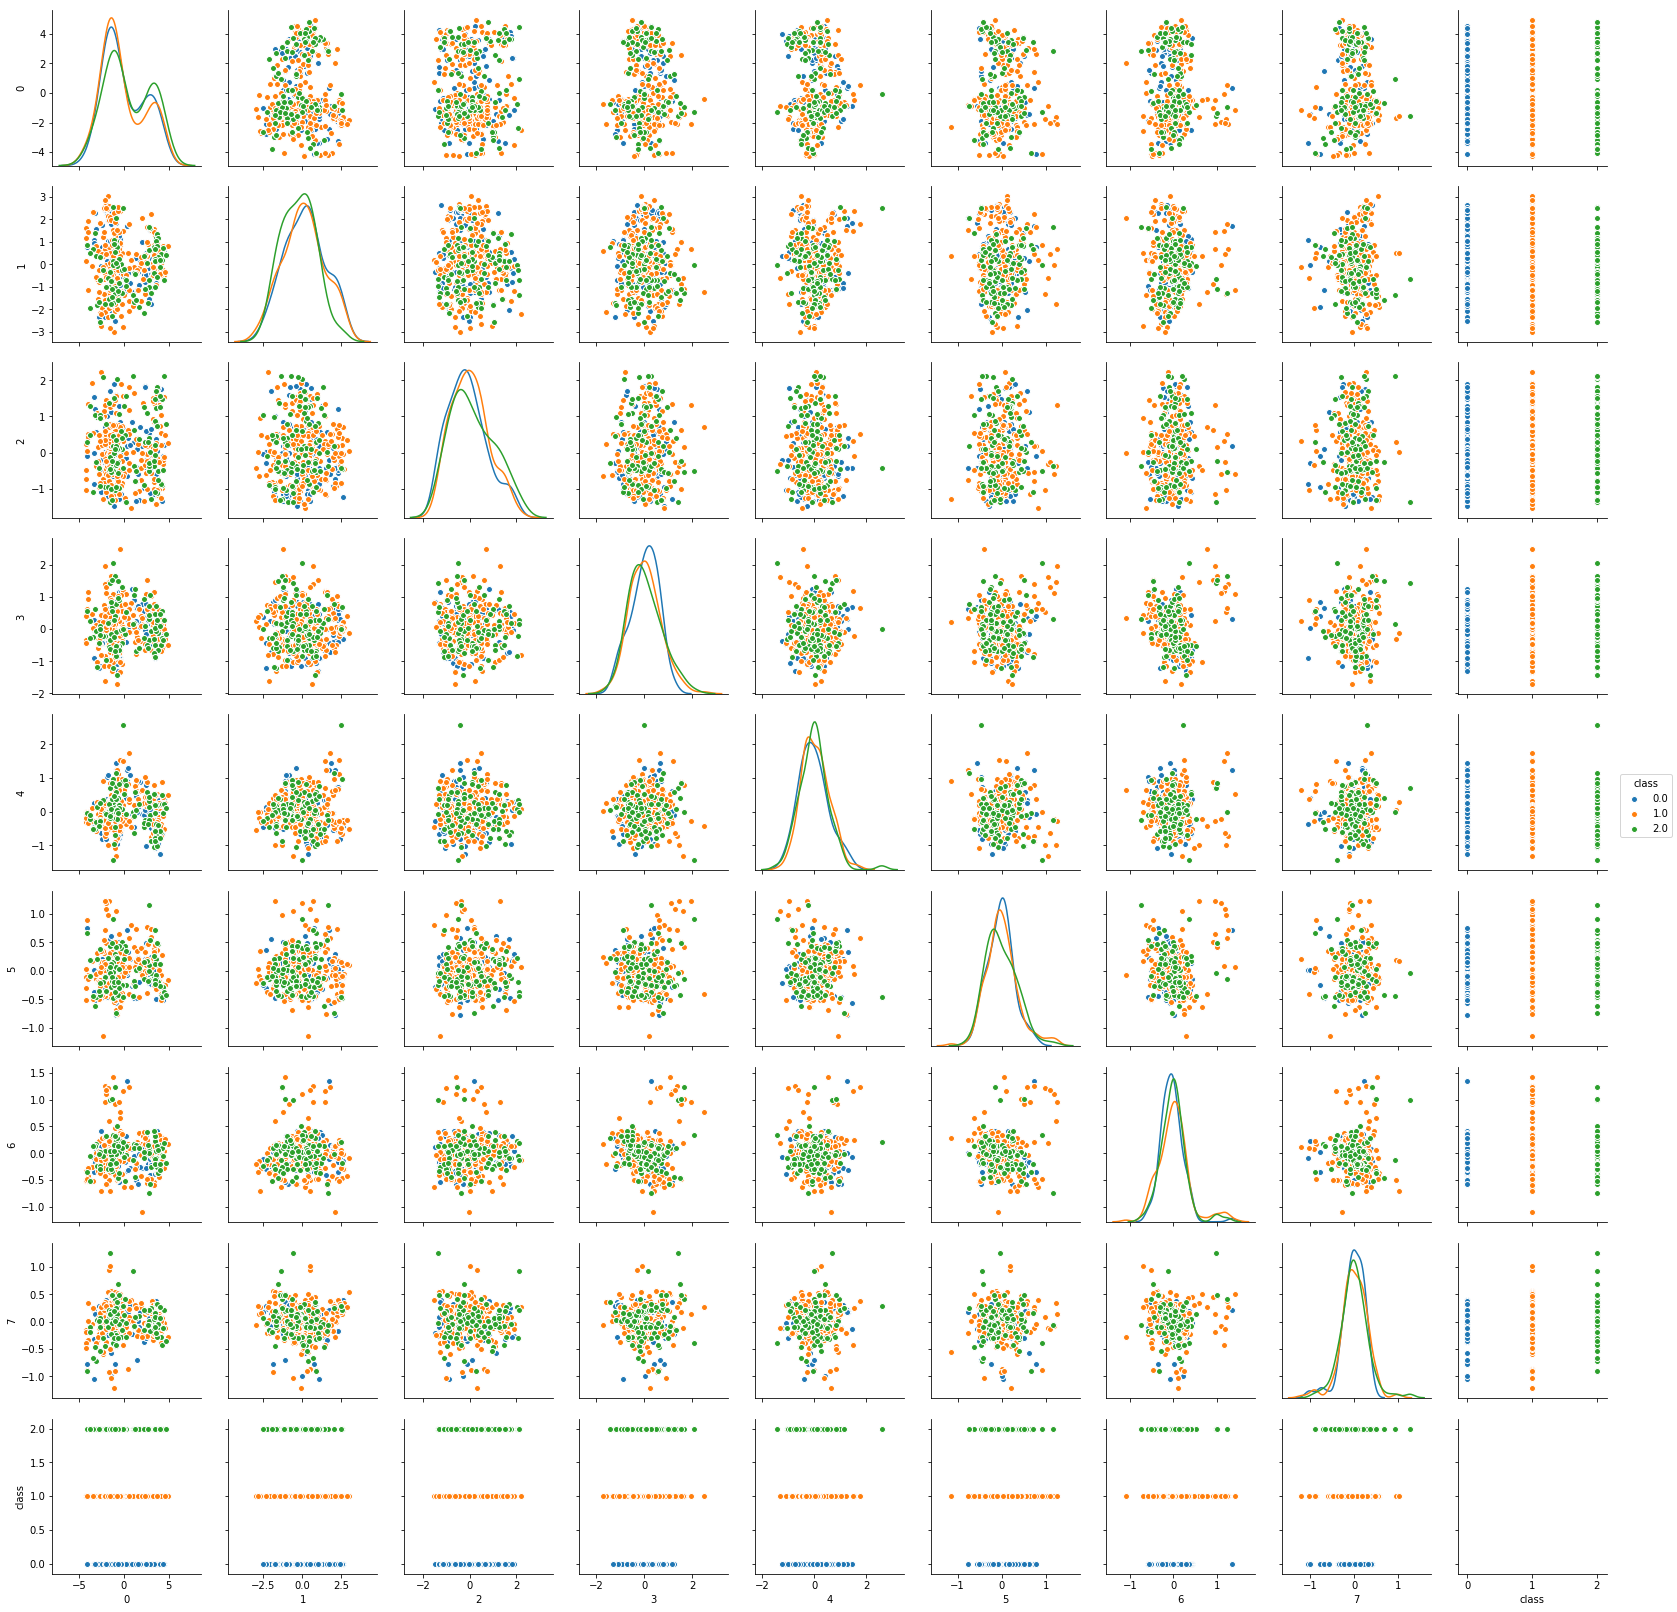

In [424]:
proj_train = pd.DataFrame(X_train_pca) 
proj_train = proj_train.join(y_train)
sns.pairplot(proj_train, diag_kind='kde',hue='class')

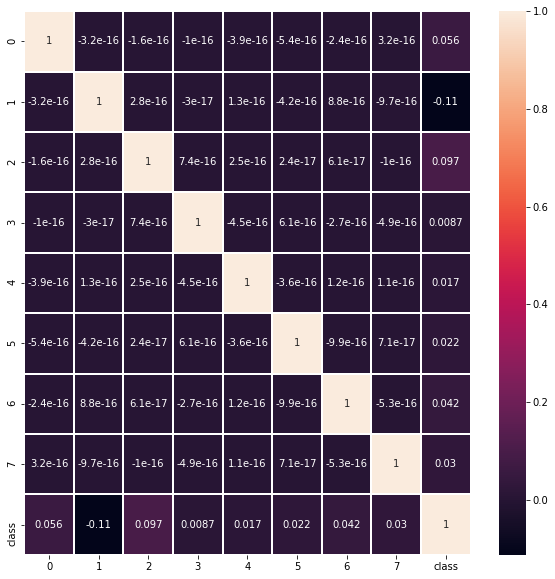

In [426]:
plt.subplots(figsize=(10,10))
sns.heatmap(proj_train.corr(), annot=True, linewidths=1)

<h3> Observation: From the pair plot we can see that the distinguished gaussians are gone, all are over-lapping.
    From the heat map we can see that all the correlation between variables are gone as well as between features and target variable.

<h1> 4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. (10 points)

 

In [401]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model = SVC()
svc_model.fit(X_train_pca, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [402]:
# check the accuracy on the training set
print(svc_model.score(X_train_pca, y_train))
print(svc_model.score(X_test_pca, y_test))

0.9543918918918919
0.8937007874015748


In [403]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV
param_grid = [{'kernel': ['linear', 'rbf'], 'C': [0.01, 0.05, 0.5, 1]}]

grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [404]:
grid_search.fit(X_train_pca, y_train) 

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=8,
       param_grid=[{'kernel': ['linear', 'rbf'], 'C': [0.01, 0.05, 0.5, 1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [412]:
grid_search.best_score_ 

0.9256756756756757

In [405]:
grid_search.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [413]:
### best estimator is c=1 and Kernel = rbf. Lets try different hyper parameters

In [407]:
svc = SVC(C=1, kernel='rbf')
svc.fit(X_train_pca, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [423]:
# check the accuracy on the training set and test set
print("Train_accuracy",svc_model.score(X_train_pca, y_train))
print("Test_accuracy",svc_model.score(X_test_pca, y_test))

Train_accuracy 0.9543918918918919
Test_accuracy 0.8937007874015748


In [419]:
from sklearn.model_selection import cross_val_score

s_train = cross_val_score(svc, X_train_pca, y_train, cv=5)

print("Train_Accuracy",s_train.mean())
print("Train_Score",s_train)

s_test = cross_val_score(svc, X_test_pca, y_test, cv=5)
print("\nTest_Accuracy",s_test.mean())
print("Test_score",s_test)

Train_Accuracy 0.9272270368382035
Train_Score [0.93333333 0.94117647 0.94915254 0.94067797 0.87179487]

Test_Accuracy 0.8545143595899898
Test_score [0.78846154 0.90384615 0.82352941 0.92       0.83673469]


In [420]:
s_train = cross_val_score(svc, X_train_pca, y_train, cv=10)
print("Train_Accuracy",s_train.mean())
print("Train_Score",s_train)

s_test = cross_val_score(svc, X_test_pca, y_test, cv=10)
print("\nTest_Accuracy",s_test.mean())
print("Test_score",s_test)

Train_Accuracy 0.9253679493883744
Train_Score [0.95       0.91666667 0.93333333 0.93333333 0.93333333 0.96666667
 0.93220339 0.94827586 0.82758621 0.9122807 ]

Test_Accuracy 0.8622948717948719
Test_score [0.85185185 0.81481481 0.88461538 0.92       0.84       0.76
 0.92       0.92       0.92       0.79166667]
